In [2]:
!pip install sas7bdat pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

Defaulting to user installation because normal site-packages is not writeable


In [3]:
brfss2014_datas = pd.read_csv(r"C:\Users\agboo\Documents\Diabetes Dataset\Diabetes Project\brfss2014_datasets.csv")
brfss2014_datas.head()

,_STATE,MSCODE,MENTHLTH,MEDCOST,CHECKUP1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,ADDEPEV2,...,_TOTINDA,_RACE,HLTHCVR1,SEX,_INCOMG,_AGEG5YR,_BMI5CAT,_EDUCAG,INCOME2,_SMOKER3
0,1,5,1,1,1,2,3,1,2,2,...,2,7,3,2,5,6,3,3,7,3
1,1,3,1,2,1,1,2,2,2,2,...,1,1,1,1,5,5,4,4,7,3
2,1,2,1,2,1,2,2,2,1,2,...,2,1,3,2,2,6,4,3,4,4
3,1,3,1,2,1,1,2,2,2,2,...,1,1,1,1,5,6,3,4,8,3
4,1,3,1,2,1,1,2,2,2,2,...,1,1,4,2,1,5,3,2,1,4


In [4]:
#UNIVARIATE
brfss2014_datas.describe()

,_STATE,MSCODE,MENTHLTH,MEDCOST,CHECKUP1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,ADDEPEV2,...,_TOTINDA,_RACE,HLTHCVR1,SEX,_INCOMG,_AGEG5YR,_BMI5CAT,_EDUCAG,INCOME2,_SMOKER3
count,129024.000000,129024.000000,129024.000000,129024.00000,129024.000000,129024.000000,129024.000000,129024.000000,129024.000000,129024.000000,...,129024.000000,129024.000000,129024.000000,129024.000000,129024.000000,129024.000000,129024.000000,129024.000000,129024.000000,129024.000000
mean,29.862033,2.792837,1.133882,1.91531,1.370009,1.216665,1.965014,1.924417,1.919116,1.787582,...,1.216665,1.461782,2.124868,1.588999,3.863808,5.361956,2.971997,3.021508,6.013587,3.267431
std,14.871258,1.660275,0.340527,0.27842,0.885690,0.411974,0.424665,0.264331,0.272658,0.409021,...,0.411974,1.467002,1.420342,0.492017,1.414079,1.323593,0.847401,0.967382,2.113732,0.977718
min,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,1.000000,1.000000,2.00000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,5.000000,2.000000,2.000000,5.000000,3.000000
50%,31.000000,2.000000,1.000000,2.00000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,2.000000,5.000000,6.000000,3.000000,3.000000,7.000000,4.000000
75%,41.000000,5.000000,1.000000,2.00000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,5.000000,6.000000,4.000000,4.000000,8.000000,4.000000
max,55.000000,5.000000,2.000000,2.00000,8.000000,2.000000,3.000000,2.000000,2.000000,2.000000,...,2.000000,8.000000,8.000000,2.000000,5.000000,7.000000,4.000000,4.000000,8.000000,4.000000


In [5]:
brfss2014_datas.columns

Index(['_STATE', 'MSCODE', 'MENTHLTH', 'MEDCOST', 'CHECKUP1', 'EXERANY2',
       'SLEPTIM1', 'CVDINFR4', 'CVDCRHD4', 'ADDEPEV2', 'DIABETE3', 'MARITAL',
       'EMPLOY1', '_TOTINDA', '_RACE', 'HLTHCVR1', 'SEX', '_INCOMG',
       '_AGEG5YR', '_BMI5CAT', '_EDUCAG', 'INCOME2', '_SMOKER3'],
      dtype='object')

In [6]:
brfss2014_select = brfss2014_datas[['MSCODE', 'MENTHLTH', 'MEDCOST', 'CHECKUP1', 'EXERANY2',
       'SLEPTIM1', 'CVDCRHD4', 'ADDEPEV2', 'DIABETE3',
       'EMPLOY1', '_TOTINDA', '_RACE', 'HLTHCVR1', 'SEX', '_INCOMG',
       '_AGEG5YR', '_BMI5CAT', '_EDUCAG', 'INCOME2', '_SMOKER3']]

In [7]:
#Change Names of Columns
brfss2014_select.columns = ['MSACODE', 'MentalHealth', 'MedicalAffordability', 'LastCheckup', 'ExerciseFrequency',
       'SleepDuration', 'HeartDisease', 'HistoryDepression', 'DiabetesOutcome',
       'Employment', 'PhysicalActivity_30Days', 'Race', 'HealthCareCoverage', 'SEX', 'PersonalIncome',
       'AgeCategory', 'BMI', 'EducationStatus', 'HouseholdIncome', 'SmokingStatus']


In [8]:
brfss2014_select.head()

,MSACODE,MentalHealth,MedicalAffordability,LastCheckup,ExerciseFrequency,SleepDuration,HeartDisease,HistoryDepression,DiabetesOutcome,Employment,PhysicalActivity_30Days,Race,HealthCareCoverage,SEX,PersonalIncome,AgeCategory,BMI,EducationStatus,HouseholdIncome,SmokingStatus
0,5,1,1,1,2,3,2,2,1,8,2,7,3,2,5,6,3,3,7,3
1,3,1,2,1,1,2,2,2,3,1,1,1,1,1,5,5,4,4,7,3
2,2,1,2,1,2,2,1,2,3,7,2,1,3,2,2,6,4,3,4,4
3,3,1,2,1,1,2,2,2,3,7,1,1,1,1,5,6,3,4,8,3
4,3,1,2,1,1,2,2,2,3,8,1,1,4,2,1,5,3,2,1,4


In [9]:
#DESCRIPTIVE ANALYSIS

In [10]:
brfss2014_select['DiabetesOutcome'] = brfss2014_select['DiabetesOutcome'].map({1: 1, 3: 0})

print(brfss2014_select)

        MSACODE  MentalHealth  MedicalAffordability  LastCheckup  \
0             5             1                     1            1   
1             3             1                     2            1   
2             2             1                     2            1   
3             3             1                     2            1   
4             3             1                     2            1   
...         ...           ...                   ...          ...   
129019        5             2                     2            2   
129020        5             1                     2            2   
129021        5             1                     2            1   
129022        5             1                     2            2   
129023        5             1                     2            2   

        ExerciseFrequency  SleepDuration  HeartDisease  HistoryDepression  \
0                       2              3             2                  2   
1                       1    

C:\Users\agboo\AppData\Local\Temp\ipykernel_11076\959120677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss2014_select['DiabetesOutcome'] = brfss2014_select['DiabetesOutcome'].map({1: 1, 3: 0})


In [11]:
brfss2014_select.describe()

,MSACODE,MentalHealth,MedicalAffordability,LastCheckup,ExerciseFrequency,SleepDuration,HeartDisease,HistoryDepression,DiabetesOutcome,Employment,PhysicalActivity_30Days,Race,HealthCareCoverage,SEX,PersonalIncome,AgeCategory,BMI,EducationStatus,HouseholdIncome,SmokingStatus
count,129024.000000,129024.000000,129024.00000,129024.000000,129024.000000,129024.000000,129024.000000,129024.000000,129024.000000,129024.000000,129024.000000,129024.000000,129024.000000,129024.000000,129024.000000,129024.000000,129024.000000,129024.000000,129024.000000,129024.000000
mean,2.792837,1.133882,1.91531,1.370009,1.216665,1.965014,1.919116,1.787582,0.165109,3.844006,1.216665,1.461782,2.124868,1.588999,3.863808,5.361956,2.971997,3.021508,6.013587,3.267431
std,1.660275,0.340527,0.27842,0.885690,0.411974,0.424665,0.272658,0.409021,0.371280,2.902922,0.411974,1.467002,1.420342,0.492017,1.414079,1.323593,0.847401,0.967382,2.113732,0.977718
min,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.00000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,5.000000,2.000000,2.000000,5.000000,3.000000
50%,2.000000,1.000000,2.00000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,5.000000,6.000000,3.000000,3.000000,7.000000,4.000000
75%,5.000000,1.000000,2.00000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,7.000000,1.000000,1.000000,3.000000,2.000000,5.000000,6.000000,4.000000,4.000000,8.000000,4.000000
max,5.000000,2.000000,2.00000,8.000000,2.000000,3.000000,2.000000,2.000000,1.000000,8.000000,2.000000,8.000000,8.000000,2.000000,5.000000,7.000000,4.000000,4.000000,8.000000,4.000000


In [12]:
diab_count = brfss2014_select['DiabetesOutcome'].value_counts()[1]
print(f"Number of people with diabetes: {diab_count}")


Number of people with diabetes: 21303


In [13]:
#STATISTICAL ANALYSIS

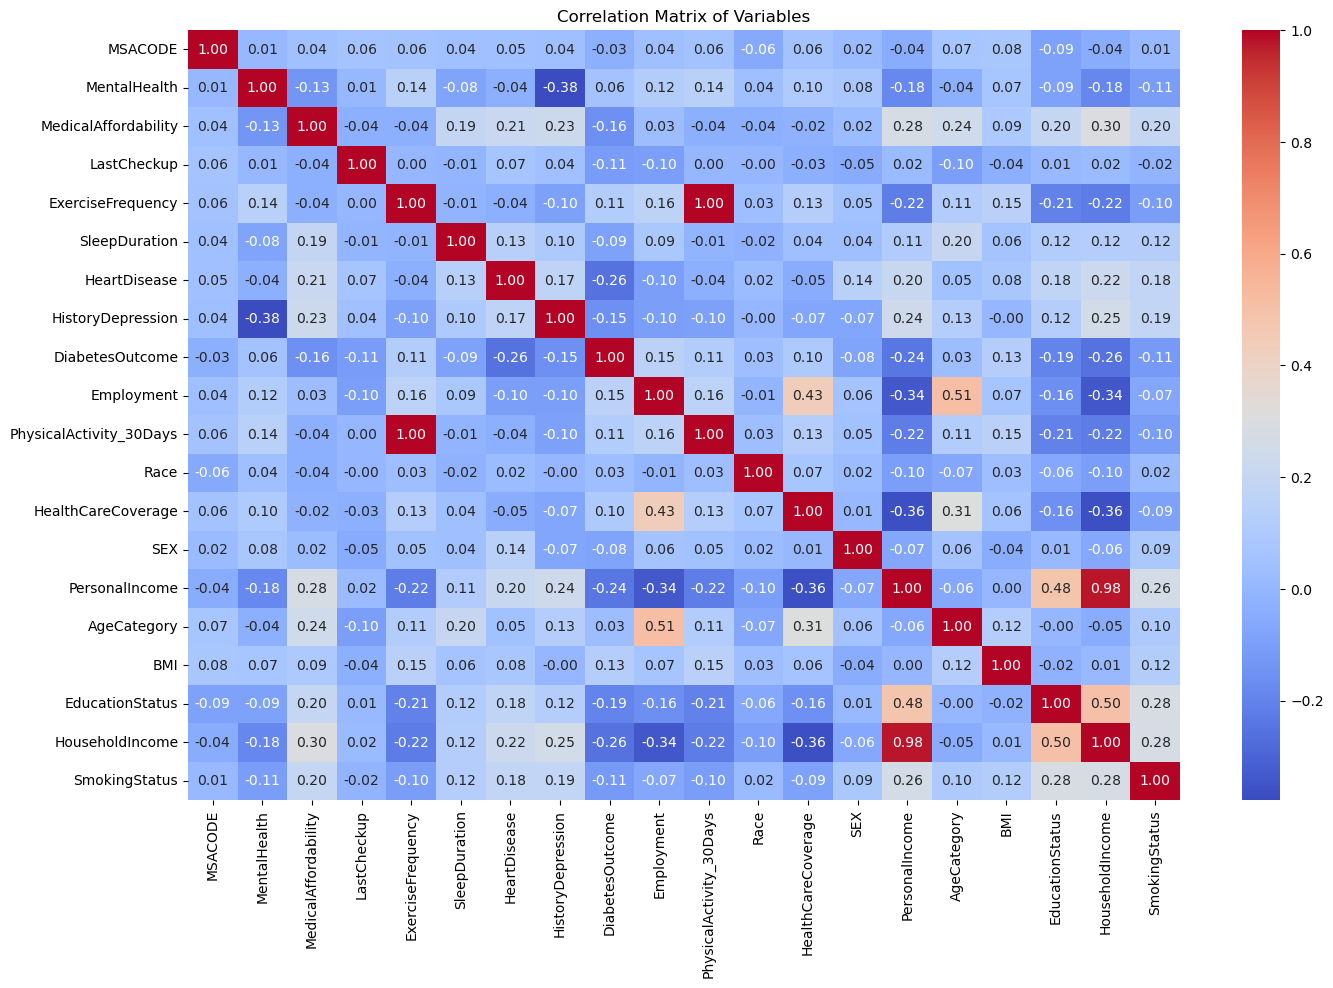

In [15]:
#CORRELATION MATRIX
import pandas as pd

# Assuming df is your DataFrame and it already contains your data
variables = ['MSACODE', 'MentalHealth', 'MedicalAffordability', 'LastCheckup', 'ExerciseFrequency',
             'SleepDuration', 'HeartDisease', 'HistoryDepression', 'DiabetesOutcome',
             'Employment', 'PhysicalActivity_30Days', 'Race', 'HealthCareCoverage', 'SEX', 
             'PersonalIncome', 'AgeCategory', 'BMI', 'EducationStatus', 'HouseholdIncome', 
             'SmokingStatus']

# Calculating the correlation matrix
correlation_matrix = brfss2014_select[variables].corr()

import seaborn as sns

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()



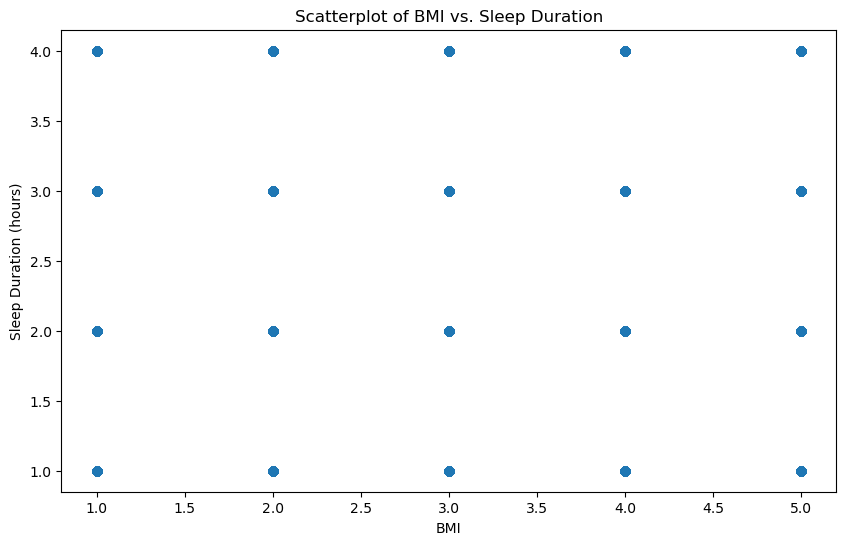

In [22]:
#SCATTERPLOT
import matplotlib.pyplot as plt

# Scatterplot for BMI vs. SleepDuration
plt.figure(figsize=(10, 6))
plt.scatter(brfss2014_select['PersonalIncome'], brfss2014_select['EducationStatus'], alpha=0.5)
plt.title('Scatterplot of BMI vs. Sleep Duration')
plt.xlabel('BMI')
plt.ylabel('Sleep Duration (hours)')
plt.show()


In [23]:
#Performing and ANOVA for the continous variables
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the model
model = ols('DiabetesOutcome ~ C(MSACODE)+ C(LastCheckup)  +  C(PersonalIncome) + C(AgeCategory) + C(BMI) + C(EducationStatus) + C(HouseholdIncome)', data=brfss2014_select).fit()


# Perform ANOVA and print the results
anova_results = sm.stats.anova_lm(model, typ=2)  # typ=2 for Type II ANOVA
print(anova_results)


                          sum_sq        df            F         PR(>F)
C(MSACODE)              1.681670       3.0     4.992707   1.836144e-03
C(LastCheckup)        103.591209       4.0   230.663811  1.054216e-197
C(PersonalIncome)     128.204527       4.0   285.469636  7.740364e-245
C(AgeCategory)        701.147643       5.0  1248.981557   0.000000e+00
C(BMI)                757.727122       3.0  2249.614638   0.000000e+00
C(EducationStatus)     20.835304       3.0    61.857896   5.893226e-40
C(HouseholdIncome)    179.653075       7.0   228.587863   0.000000e+00
Residual            14483.263290  128998.0          NaN            NaN


In [262]:
#In summary, based on the p-values, MSACODE, Age Category, BMI, and Education Status have a statistically significant effect on the dependent variable, 
#while Personal Income and Household Income do not appear to have a significant effect at the 0.05 significance level. 

In [263]:
#Prediction Power:

#BMI appears to have the strongest predictive power with the highest F-value 2334.623413 and a very low p-value (practically 0), suggesting that BMI is a strong predictor of diabetes outcome.

#Age Category also has a high F-value 1394.539194 and a very low p-value, indicating it's a significant predictor of the outcome.

#Last CheckUp

#MSACODE has a lower F-value than BMI and Age Category but still a significant p-value, placing it next in terms of predictive strength.

#Education Status has a lower F-value 62.244093 than both BMI and Age Category but is still statistically significant, suggesting it's a meaningful predictor but less strong than BMI or Age Category.

In [24]:
#Performing Binary Logistic Regression for All the Predictor Variables
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming brfss2014_select is your DataFrame
formula = '''DiabetesOutcome ~  C(MentalHealth) + C(MedicalAffordability) + 
              C(ExerciseFrequency) + C(SleepDuration) + 
             C(HeartDisease) + C(HistoryDepression) + C(Employment) + C(Race) + C(HealthCareCoverage) + 
             C(SEX) + C(SmokingStatus)+C(MSACODE)+ C(LastCheckup)  +  C(PersonalIncome) + C(AgeCategory) + C(BMI) + C(EducationStatus) + C(HouseholdIncome)'''

# Fit the logistic regression model
model = smf.logit(formula, data=brfss2014_select).fit()

# Print the summary of the model
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.346359
         Iterations 25
                           Logit Regression Results                           
Dep. Variable:        DiabetesOutcome   No. Observations:               129024
Model:                          Logit   Df Residuals:                   128966
Method:                           MLE   Df Model:                           57
Date:                Fri, 29 Mar 2024   Pseudo R-squ.:                  0.2270
Time:                        20:29:54   Log-Likelihood:                -44689.
converged:                       True   LL-Null:                       -57809.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       51.3296    6.4e+05   8.02e-05      1.00

In [25]:
#FEATURE IMPORTANCE ANALYSIS

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

# Encode categorical variables if not already done
df = pd.get_dummies(brfss2014_select)

# Separate features and target
X = df.drop('DiabetesOutcome', axis=1)
y = df['DiabetesOutcome']

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Scale your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
#TRAIN THE MODEL
# Initialize and train the gradient boosting classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train_scaled, y_train)


GradientBoostingClassifier(random_state=42)

In [28]:
#FEATURE IMPORTANCE
# Get feature importance
feature_importances = gb_clf.feature_importances_

# Create a DataFrame for easier visualization
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

print(features_df)



                    Feature  Importance
14              AgeCategory    0.296625
15                      BMI    0.218685
6              HeartDisease    0.178235
8                Employment    0.096693
17          HouseholdIncome    0.055915
3               LastCheckup    0.034652
13           PersonalIncome    0.028644
10                     Race    0.021959
16          EducationStatus    0.011985
12                      SEX    0.010731
4         ExerciseFrequency    0.009329
11       HealthCareCoverage    0.009052
9   PhysicalActivity_30Days    0.008423
7         HistoryDepression    0.007250
5             SleepDuration    0.006137
1              MentalHealth    0.002248
18            SmokingStatus    0.001318
0                   MSACODE    0.001107
2      MedicalAffordability    0.001012


In [29]:
brfss2014_selected = brfss2014_select[['AgeCategory', 'DiabetesOutcome', 'BMI', 'HeartDisease', 'Employment', 'HouseholdIncome', 'LastCheckup', 'PersonalIncome', 'Race', 'EducationStatus', 'SEX', 'ExerciseFrequency']]

In [30]:
X = brfss2014_selected[['AgeCategory', 'BMI', 'HeartDisease', 'Employment', 'HouseholdIncome', 'LastCheckup', 'PersonalIncome', 'Race', 'EducationStatus', 'SEX', 'ExerciseFrequency']]

y = brfss2014_selected['DiabetesOutcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [31]:
brfss2014_selected['DiabetesOutcome'].unique()

array([1, 0], dtype=int64)

In [32]:
from sklearn.metrics import classification_report

In [33]:
#logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:, 1]


In [34]:
# Confusion Matrix
print(confusion_matrix(y_test, lr_predictions))

# Classification Report
print(classification_report(y_test, lr_predictions))

[[31538   804]
 [ 4981  1385]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     32342
           1       0.63      0.22      0.32      6366

    accuracy                           0.85     38708
   macro avg       0.75      0.60      0.62     38708
weighted avg       0.83      0.85      0.82     38708



In [35]:
from sklearn.metrics import confusion_matrix, roc_auc_score

# Assuming `predictions` and `probabilities` are already obtained from the model
conf_matrix = confusion_matrix(y_test, lr_predictions)
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate metrics
lr_accuracy = (TP + TN) / float(TP + TN + FP + FN)
lr_sensitivity = TP / float(TP + FN)  # equivalent to recall
lr_specificity = TN / float(TN + FP)
lr_auc = roc_auc_score(y_test, lr_probabilities)

In [36]:
print(f'Accuracy: {lr_accuracy:.2f}')
print(f'Sensitivity: {lr_sensitivity:.2f}')
print(f'Specificity: {lr_specificity:.2f}')
print(f'AUC: {lr_auc:.2f}')

Accuracy: 0.85
Sensitivity: 0.22
Specificity: 0.98
AUC: 0.78


In [37]:
#NAIVE BAYES
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_probabilities = nb_model.predict_proba(X_test)[:, 1]


In [38]:
# Confusion Matrix
print(confusion_matrix(y_test, nb_predictions))
# Classification Report
print(classification_report(y_test, nb_predictions))

[[28076  4266]
 [ 3610  2756]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     32342
           1       0.39      0.43      0.41      6366

    accuracy                           0.80     38708
   macro avg       0.64      0.65      0.64     38708
weighted avg       0.80      0.80      0.80     38708



In [39]:
from sklearn.metrics import confusion_matrix, roc_auc_score

# Assuming `predictions` and `probabilities` are already obtained from the model
conf_matrix = confusion_matrix(y_test, nb_predictions)
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate metrics
nb_accuracy = (TP + TN) / float(TP + TN + FP + FN)
nb_sensitivity = TP / float(TP + FN)  # equivalent to recall
nb_specificity = TN / float(TN + FP)
nb_auc = roc_auc_score(y_test, nb_probabilities)

In [40]:
print(f'Accuracy: {nb_accuracy:.2f}')
print(f'Sensitivity: {nb_sensitivity:.2f}')
print(f'Specificity: {nb_specificity:.2f}')
print(f'AUC: {nb_auc:.2f}')

Accuracy: 0.80
Sensitivity: 0.43
Specificity: 0.87
AUC: 0.75


In [41]:
#RANDOM FOREST
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

In [42]:
# Confusion Matrix
print(confusion_matrix(y_test, rf_predictions))
# Classification Report
print(classification_report(y_test, rf_predictions))

[[30995  1347]
 [ 4865  1501]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     32342
           1       0.53      0.24      0.33      6366

    accuracy                           0.84     38708
   macro avg       0.70      0.60      0.62     38708
weighted avg       0.81      0.84      0.81     38708



In [43]:
from sklearn.metrics import confusion_matrix, roc_auc_score

# Assuming `predictions` and `probabilities` are already obtained from the model
conf_matrix = confusion_matrix(y_test, rf_predictions)
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate metrics
rf_accuracy = (TP + TN) / float(TP + TN + FP + FN)
rf_sensitivity = TP / float(TP + FN)  # equivalent to recall
rf_specificity = TN / float(TN + FP)
rf_auc = roc_auc_score(y_test, rf_probabilities)

In [44]:
print(f'Accuracy: {rf_accuracy:.2f}')
print(f'Sensitivity: {rf_sensitivity:.2f}')
print(f'Specificity: {rf_specificity:.2f}')
print(f'AUC: {rf_auc:.2f}')

Accuracy: 0.84
Sensitivity: 0.24
Specificity: 0.96
AUC: 0.76


In [45]:
#DESICION TREES
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_probabilities = dt_model.predict_proba(X_test)[:, 1]

In [47]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_predictions))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, dt_predictions))

Confusion Matrix:
[[30760  1582]
 [ 4855  1511]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.91     32342
           1       0.49      0.24      0.32      6366

    accuracy                           0.83     38708
   macro avg       0.68      0.59      0.61     38708
weighted avg       0.80      0.83      0.81     38708



In [48]:
# Calculate metrics
conf_matrix = confusion_matrix(y_test, dt_predictions)
TN, FP, FN, TP = conf_matrix.ravel()

dt_accuracy = (TP + TN) / float(TP + TN + FP + FN)
dt_sensitivity = TP / float(TP + FN)  # equivalent to recall
dt_specificity = TN / float(TN + FP)
dt_auc = roc_auc_score(y_test, dt_probabilities)


In [49]:

print(f'Accuracy: {dt_accuracy:.2f}')
print(f'Sensitivity: {dt_sensitivity:.2f}')
print(f'Specificity: {dt_specificity:.2f}')
print(f'AUC: {dt_auc:.2f}')

Accuracy: 0.83
Sensitivity: 0.24
Specificity: 0.95
AUC: 0.69


In [50]:
#GRADIENT BOOST
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)
gbm_predictions = gbm_model.predict(X_test)
gbm_probabilities = gbm_model.predict_proba(X_test)[:, 1]

In [51]:
# Confusion Matrix
print(confusion_matrix(y_test, gbm_predictions))
# Classification Report
print(classification_report(y_test, gbm_predictions))

[[31874   468]
 [ 5115  1251]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     32342
           1       0.73      0.20      0.31      6366

    accuracy                           0.86     38708
   macro avg       0.79      0.59      0.61     38708
weighted avg       0.84      0.86      0.82     38708



In [52]:
from sklearn.metrics import confusion_matrix, roc_auc_score

# Assuming `predictions` and `probabilities` are already obtained from the model
conf_matrix = confusion_matrix(y_test, gbm_predictions)
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate metrics
gbm_accuracy = (TP + TN) / float(TP + TN + FP + FN)
gbm_sensitivity = TP / float(TP + FN)  # equivalent to recall
gbm_specificity = TN / float(TN + FP)
gbm_auc = roc_auc_score(y_test, gbm_probabilities)

In [53]:
print(f'Accuracy: {gbm_accuracy:.2f}')
print(f'Sensitivity: {gbm_sensitivity:.2f}')
print(f'Specificity: {gbm_specificity:.2f}')
print(f'AUC: {gbm_auc:.2f}')

Accuracy: 0.86
Sensitivity: 0.20
Specificity: 0.99
AUC: 0.81


In [54]:
#NEURAL NETWORKS

In [55]:
nn_model = MLPClassifier(random_state=42, max_iter=1000)
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)
nn_probabilities = nn_model.predict_proba(X_test)[:, 1]

In [56]:
# Confusion Matrix
print(confusion_matrix(y_test, nn_predictions))
# Classification Report
print(classification_report(y_test, nn_predictions))

[[31966   376]
 [ 5244  1122]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     32342
           1       0.75      0.18      0.29      6366

    accuracy                           0.85     38708
   macro avg       0.80      0.58      0.60     38708
weighted avg       0.84      0.85      0.81     38708



In [57]:
from sklearn.metrics import confusion_matrix, roc_auc_score

# Assuming `predictions` and `probabilities` are already obtained from the model
conf_matrix = confusion_matrix(y_test, nn_predictions)
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate metrics
nn_accuracy = (TP + TN) / float(TP + TN + FP + FN)
nn_sensitivity = TP / float(TP + FN)  # equivalent to recall
nn_specificity = TN / float(TN + FP)
nn_auc = roc_auc_score(y_test, nn_probabilities)

In [58]:
print(f'Accuracy: {nn_accuracy:.2f}')
print(f'Sensitivity: {nn_sensitivity:.2f}')
print(f'Specificity: {nn_specificity:.2f}')
print(f'AUC: {nn_auc:.2f}')

Accuracy: 0.85
Sensitivity: 0.18
Specificity: 0.99
AUC: 0.81
